# Chapter 6: Dynamical Systems

Chapter 6 of the book [PL] <b>Fraktale i chaos</b> (eng.: "Fractals and Chaos") written by <i>Jacek Kudrewicz</i> describes dynamical systems with discrete and continuous time.

I want to honor authors of books, papers and code examples which are used by me during my learning. That's why every new notebook will start from the list of literature.

## Bibliography:

#### Base:
* <b>Fraktale i chaos</b> (eng.: "Fractals and Chaos") by <i>Jacek Kudrewicz</i>.

#### Additional:

* 

## 6.1 Discrete-time dynamical systems

Dynamical systems described in the book (Fractals and Chaos) are not exactly systems known from engineering but their generalization. Book describes dynamical systems as the projections of metric space into itself. In practice equations are not so different from the calssic mechanical systems such as equation of the motion (velocity):

$$ \frac{ds}{dt} = v(t) $$

<b>Dynamical system with a discrete time steps -> the cascade</b>

If $ X $ is a metric space and $ \phi $ is a projection of this space into itself then the pair $ (X, \phi) $ is a dynamical system with a discrete time or cascade. We analyze changes in the set of elements if the $ X $: $ x_{0}, x_{1}, x_{2}, x_{3}, ..., $ where $ x_{(n + 1)} = \phi(x_{n}) $.

<b>Example</b>

Author of a book gives an example of the iterative method of solving differential equation but I try to solve more "real-life" problem which is easier to understand. To make thing more interesting I've chosen SIR model known from epidemiology (susceptible, infected, recovered).

### 6.1.1 SIR model

More information about the model is available here: https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology#The_SIR_model and I'm going straight into equations.

$$ \frac{dS}{dt} = -\frac{\beta IS}{N} $$
$$ \frac{dI}{dt} = \frac{\beta IS}{N} - \gamma I $$
$$ \frac{dR}{dt} = \gamma I $$

where:

* $ S $ - the number of susceptible individuals,
* $ I $ - the number of infected individuals,
* $ R $ - the number of recovered individuals.

At this point we assume that $ S + I + R = N = const $ where $ N $ is the base population. This assumption gives us way to transform these equation into dynamical systems which may be analyzed by a computer.

At the time $ t = 0 $ number of recovered will be 0 too. Then only $ S + I = N $ and we may assume that at the beginning 0.01% of population is infected.

Parameters $ \beta, \gamma $ are, in order, probability of infection and probability of recovery (equal $ \frac{1}{T} $ where $ T $ is the mean time of sickness).

I assume that:
* $ N = 1000000 $
* $ \beta = 0.5 $
* $ \gamma = 0.14 $

Then model will look like:

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt    

In [21]:
def sir_model(N=1000000, beta=0.5, gamma=0.14, infected_ratio=0.00001, time_delta=10):
    t = 0
    S = [N * (1 - infected_ratio)]
    I = [N * infected_ratio]
    R = [0]
    
    while t < time_delta:
        St = -(beta * I[-1] * S[-1]) / N
        It = (beta * I[-1] * S[-1]) / N - gamma * I[-1]
        Rt = gamma * I[-1]
        
        S.append(St)
        I.append(It)
        R.append(Rt)
        
        if (N-R[-1]) < 0.5:
            t = 1000
        t = t + 1
    return np.asarray(S), np.asarray(I), np.asarray(R)

In [22]:
s, i, r = sir_model()

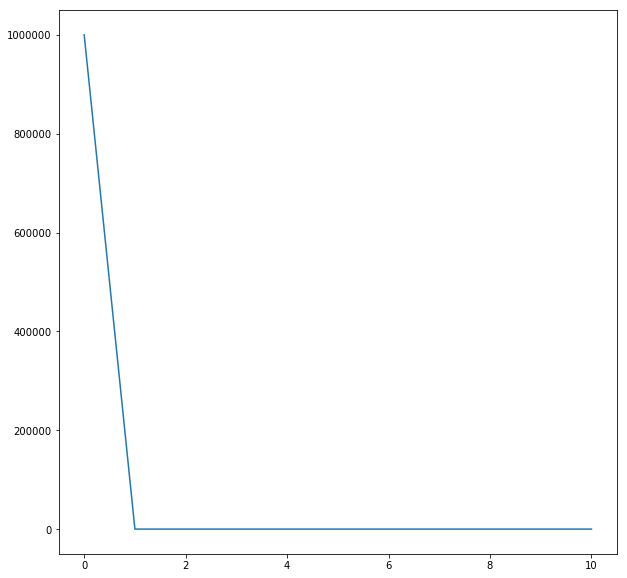

In [23]:
plt.figure(figsize=(10, 10))
plt.plot(s)
plt.show()

## 6.2 Continuous-time dynamical systems

In [24]:
s

array([  9.99990000e+05,  -4.99995000e+00,   8.99978500e-06,
         2.26795482e-12,  -8.00137635e-20,  -3.95205549e-28,
         2.73280979e-37,   2.64559774e-47,  -3.58563645e-58,
        -6.80356803e-70,   1.80732079e-82])

In [25]:
i

array([  1.00000000e+01,   3.59995000e+00,  -5.04002000e-01,
         7.05602800e-02,  -9.87843920e-03,   1.38298149e-03,
        -1.93617408e-04,   2.71064372e-05,  -3.79490120e-06,
         5.31286168e-07,  -7.43800635e-08])

In [26]:
r

array([  0.00000000e+00,   1.40000000e+00,   5.03993000e-01,
        -7.05602800e-02,   9.87843920e-03,  -1.38298149e-03,
         1.93617408e-04,  -2.71064372e-05,   3.79490120e-06,
        -5.31286168e-07,   7.43800635e-08])